## Least Squares B-Spline Approximation (LSBSA)
### Application of LSBSA to approximate <u>2D surface</u> fitting problem
Authors: *Alireza Amiri-Simkooei, Fatemeh Esmaeili, Roderik Lindenburgh, Delft University of Technology*

Version: *1.0, April 2024*

In [6]:
# import the necessary packages 
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy import signal
from scipy.stats.distributions import chi2
from scipy.interpolate import BSpline, PPoly
import scipy.io

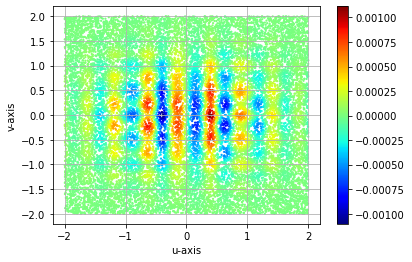

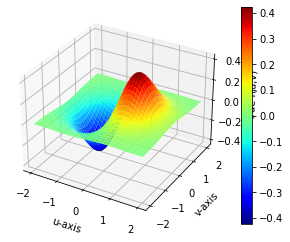

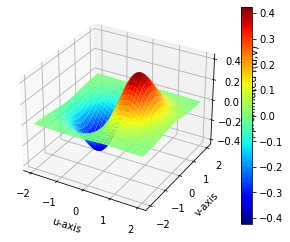

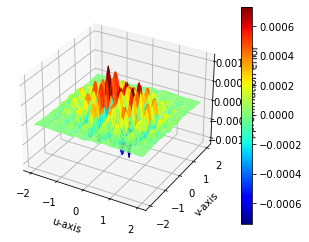

Sigma is: 0.00022628219887043456


In [7]:
###### Example on approximation of a known surface z=f(u,v) using LSBSA
# import least-squares B-spline approximation (LSBSA) functions
import lsbsa_package as bs
# introduce m number of observations
# generate 20000 random positions in u-v plane between -2 and 2
m = 20000
u = 4 * (np.random.rand(m) - 0.5)
v = 4 * (np.random.rand(m) - 0.5)
z =  u * np.exp(-u ** 2 - v ** 2)  # compute the known function f(u,v)=u*exp(-u^2 - v^2) on these points
# observations y (without error) in the model y = Ax
y = z
# introduce knot intervals for u and v
eps1 = 1e-8;
knotu = np.array([-2-eps1, -1.6, -1.2, -0.8, -0.4, 0, 0.4, 0.8, 1.2, 1.6, 2+eps1]) # eps1 is introduced to make sure that 
# all u's are in the intervals defined by knotu
knotv = np.array([-2-eps1, -1.6, -1.2, -0.8, -0.4, 0, 0.4, 0.8, 1.2, 1.6, 2+eps1]) # # eps1 is introduced to make sure that 
# all v's are in the intervals defined by knotv
# DEFINE the B-Spline degrees
# Bspline degree along u and v axes : 1:Linear 2:Quadratic 3:Cubic 4: Quartic, etc
degu = 3 # considering here the cubic b-spline, but other possibilities possible
degv = 3 # # considering here the cubic b-spline, but other possibilities possible
# establish the design matrix in the model y=Ax+e
A = bs.A_matrix_2D(u, v, knotu, knotv, degu, degv)
m, n = A.shape
# apply the least squares method to estimate x, y, e and sigma
xhat, yhat, ehat, sigma = bs.lsfit(A,y) 
Sig = sigma    
# plot least square results
plt.scatter(u, v, s=5, c=ehat, cmap='jet', marker='o', edgecolors='none')
plt.colorbar()
plt.xlabel('u-axis')
plt.ylabel('v-axis')
plt.box(on=True)
plt.grid(True)
plt.show()
# Define the grid
x1 = np.arange(-2, 2.05, 0.05)
y1 = np.arange(-2, 2.05, 0.05)
U, V = np.meshgrid(x1, y1)
# Define the true function
Z = U * np.exp(-U**2 - V**2)
# Calculate predicted values
m1, n1 = U.shape
Ap = bs.A_matrix_2D(U.flatten(), V.flatten(), knotu, knotv, degu, degv)
zp = np.dot(Ap, xhat)
Zp = zp.reshape(m1, n1)
# Plot true surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(U, V, Z, cmap='jet')
fig.colorbar(surf)
ax.set_xlabel('u-axis')
ax.set_ylabel('v-axis')
ax.set_zlabel('True f(u,v)')
ax.grid(True)
plt.show()
# Plot approximated surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(U, V, Zp, cmap='jet')
fig.colorbar(surf)
ax.set_xlabel('u-axis')
ax.set_ylabel('v-axis')
ax.set_zlabel('Approximated f(u,v)')
ax.grid(True)
plt.show()
# Plot approximation error
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(U, V, Z - Zp, cmap='jet')
fig.colorbar(surf)
ax.set_xlabel('u-axis')
ax.set_ylabel('v-axis')
ax.set_zlabel('Approximation error')
ax.grid(True)
#ax.view_init(45,45)
plt.show()
print('Sigma is:', Sig)